ANALISE DE IMAGEM COM PYTHON

Bibliotecas necessárias

In [ ]:
# py -m pip install opencv-python
# py -m pip install pillow
# py -m pip install -u pillow #Este comando serve para realizar o upgrade da biblioteca 


Imports necessários


In [3]:
#importação de biblioteca
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [9]:
#Lendo uma imagem usando OpenCV:
imagem_opencv = cv2.imread('imagem.png') #A variavel armazena os dados da imagem

#Abrir uma imagem usando PIL:
imagem_pil = Image.open('imagem.jpg')

print(imagem_opencv)

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [215 222 225]
  [215 222 225]
  [215 222 225]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [215 222 225]
  [215 222 225]
  [215 222 225]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [215 222 225]
  [215 222 225]
  [215 222 225]]

 ...

 [[212 229 239]
  [212 229 239]
  [212 229 239]
  ...
  [141 179 210]
  [140 178 209]
  [135 174 205]]

 [[213 230 240]
  [213 230 240]
  [213 230 240]
  ...
  [144 182 213]
  [142 180 211]
  [137 176 207]]

 [[213 230 240]
  [213 230 240]
  [213 230 240]
  ...
  [141 179 210]
  [140 178 209]
  [137 176 207]]]


Manipulando Imagens

In [ ]:
# Redimensionar a imagem usando OpenCV
from ctypes.wintypes import RGB

imagem_redimensionada_opencv = cv2.resize(imagem_opencv, (150, 100))
# plt.imshow(imagem_redimensionada_opencv)

# Rotacionar a imagem usando PIL
imagem_rotacionada_pil = imagem_pil.rotate(90)
# plt.imshow(imagem_rotacionada_pil)

# Buscar as cores

cores = []
for cor_rgb in imagem_redimensionada_opencv.getdata():
    if cor_rgb not in cores:
        cores.append(cor_rgb)
cores =imagem_redimensionada_opencv.convert(RGB).getcolors(maxcolors=1000)
print(cores)




In [33]:
# Converter a imagem para outro formato usando OpenCV
cv2.imwrite('PlacaCarro.jpg', imagem_opencv)

# Exemplo de conversão de formato usando PIL:
# Converter a imagem para outro formato usando PIL
imagem_pil.save('imagem_conversao.png', format='PNG')


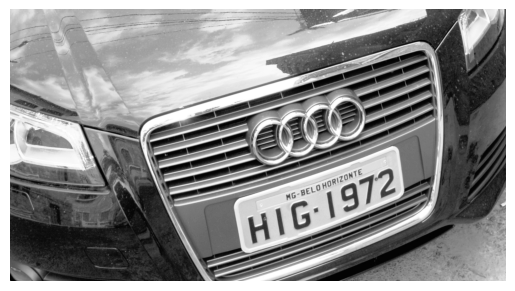

In [51]:
#Carregar imagem em escala de cinza
imagem = cv2.imread('PlacaCarro.jpg', cv2.IMREAD_GRAYSCALE)

#Equalizar o histograma da imagem
#Isso aumenta o contraste da imagem, melhorando a distribuição 
imagem_equalizada = cv2.equalizeHist(imagem)

plt.imshow(imagem)
plt.axis('off')
plt.show

plt.imshow(imagem_equalizada, cmap= 'gray')
plt.axis('off')
plt.show


# Aplicar filtro de suavização (média)
imagem_suavizada = cv2.blur(imagem, (5, 5))  # kernel de 5x5


In [ ]:
# Exemplo de Segmentação por Limiarização:


import cv2
import matplotlib.pyplot as plt


# Carregar a imagem em escala de cinza
imagem = cv2.imread("imagem.jpg", cv2.IMREAD_GRAYSCALE)


# Aplicar limiarização
imagem_segmentada = cv2.threshold(imagem, 127, 255, cv2.THRESH_BINARY)


# Mostrar a imagem segmentada
plt.imshow(imagem_segmentada, cmap="gray")
plt.axis("off")
plt.title("Segmentação por Limiarização")
plt.show()

Imagem escala de cinza

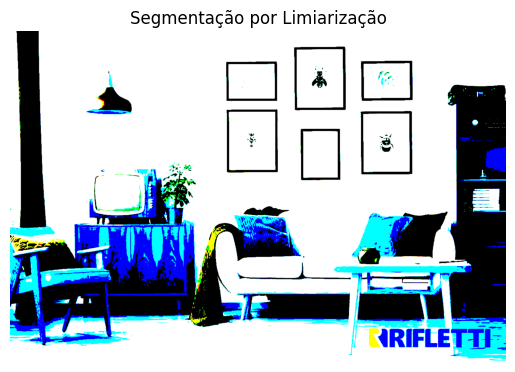

In [57]:
# Carregar a imagem em escala de cinza
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('imagem.png', cv2.COLOR_BayerGRBG2BGR_EA)

# Aplicar limiarização
_, imagem_segmentada = cv2.threshold(imagem, 127, 255, cv2.THRESH_BINARY)
# Aplicar limiarização para segmentar a imagem em preto e branco
# 127 é o valor de limiar, pixels abaixo deste valor serão definidos como preto (0), e acima como branco (255)

# Mostrar a imagem segmentada
plt.imshow(imagem_segmentada, cmap='gray')
plt.axis('off')
plt.title('Segmentação por Limiarização')
plt.show()

Contornos

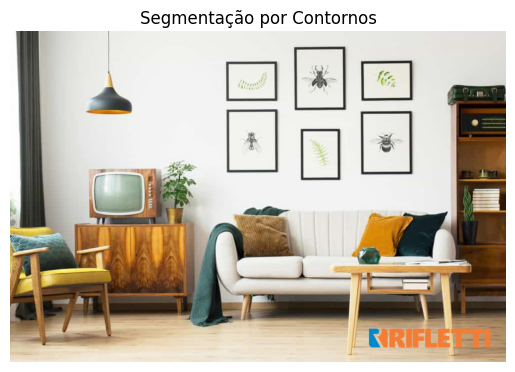

In [70]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('imagem.jpg')

# Converter a imagem para escala de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar detecção de contornos
contornos, _ = cv2.findContours(imagem_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = contornos[0] if len(contornos) == 2 else contornos[1]

# Criar uma cópia da imagem para desenhar os contornos
imagem_contornos = imagem.copy()

# Desenhar os contornos na imagem de contornos
# cv2.drawContours desenha os contornos encontrados na imagem de contornos
# -1 indica que todos os contornos devem ser desenhados
# (0, 255, 0) especifica a cor dos contornos (no formato BGR, verde neste caso)
# 2 especifica a espessura da linha dos contornos
cv2.drawContours(imagem_contornos, contornos, -1, (0, 255, 0), 2)

# Mostrar a imagem com contornos
plt.imshow(cv2.cvtColor(imagem_contornos, cv2.COLOR_BGR2RGB))  # Converter de BGR para RGB para exibir corretamente com matplotlib
plt.axis('off')  # Desativa os eixos
plt.title('Segmentação por Contornos')  # Adiciona um título à imagem
plt.show()  # Exibe a imagem

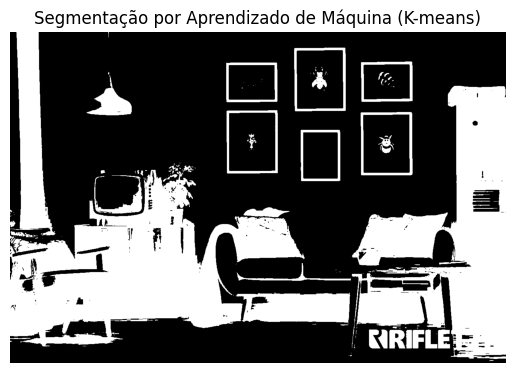

In [63]:
# Exemplo de Segmentação Baseada em Aprendizado de Máquina:
# Este código demonstra um exemplo de segmentação de imagem usando o algoritmo K-means.

# Instale a biblioteca scikit-learn se ainda não estiver instalada
# py -m pip install -U scikit-learn

# Importar bibliotecas necessárias
from sklearn.cluster import KMeans  # Importa o algoritmo K-means da biblioteca scikit-learn
import numpy as np  # Importa a biblioteca NumPy para manipulação de arrays

# Converter imagem para um vetor 1D
# A imagem é convertida em um array 1D para facilitar a aplicação do algoritmo K-means
imagem_reshaped = imagem.reshape((-1, 3))  # Reshape para um vetor de características (cada linha representa um pixel)

# Aplicar K-means para segmentação
# O algoritmo K-means é aplicado para agrupar os pixels da imagem em clusters
# n_clusters=2 indica que queremos dividir a imagem em 2 clusters (por exemplo, objetos e fundo)
kmeans = KMeans(n_clusters=2)  # Cria uma instância do algoritmo K-means com 2 clusters
kmeans.fit(imagem_reshaped)  # Aplica o K-means aos dados da imagem
clusters = kmeans.predict(imagem_reshaped)  # Prevê o cluster de cada pixel na imagem

# Remontar a imagem segmentada
# A imagem segmentada é reconstruída usando os clusters previstos
# A forma da imagem resultante é a mesma da imagem original
imagem_segmentada = clusters.reshape(imagem.shape[:2])  # Reshape para a forma da imagem original

# Mostrar a imagem segmentada
# A imagem segmentada é exibida em escala de cinza
plt.imshow(imagem_segmentada, cmap='gray')  # Exibe a imagem segmentada
plt.axis('off')  # Desativa os eixos
plt.title('Segmentação por Aprendizado de Máquina (K-means)')  # Adiciona um título à imagem
plt.show()  # Mostra a imagem segmentada